<h1><center> Рынок заведений общественного питания Москвы </center></h1>

<a id=0 ></a>

# Введение

Инвесторы из фонда «Shut Up and Take My Money» решили попробовать себя в новой области и открыть заведение общественного питания в Москве. Заказчики ещё не знают, что это будет за место: кафе, ресторан, пиццерия, паб или бар, — и какими будут расположение, меню и цены. Подготовим исследование рынка Москвы, найдём его особенности и презентуем полученные результаты, которые в будущем помогут в выборе подходящего инвесторам места. Более подробно остановимся на кофейнях, на окрытие которой нацелен инвестор.

Нам доступен датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Информация, размещённая в сервисе Яндекс Бизнес носит исключительно справочный характер, она могла быть добавлена пользователями или найдена в общедоступных источниках.

Оглавление (план работы):
- [1 Загрузка и подготовка данных к анализу](#1);
    - [1.1 Загрузка данных](#1);
    - [1.2 Предобработка данных](#1.2.1);
        - [1.2.1 Проверка наличия дубликатов](#1.2.1);
        - [1.2.2 Провека наличия поопусков](#1.2.2);
        - [1.2.3 Проверка наличия аномальных значений](#1.2.3)
            - [1.2.3.1 Проверка корректности адресов заведений](#1.2.3.1);
            - [1.2.3.2 Проверка значений координат](#1.2.3.2);
            - [1.2.3.3 Проверка значений в числовых столбцах](#1.2.3.3);
            - [1.2.3.4 Проверка значений среднего чека](#1.2.3.4);
            - [1.2.3.5 Провека значений количества посадочных мест](#1.2.3.5);
        - [1.2.4 Добавление новых столбцов](#1.2.4)
- [2 Исследовательский анализ данных](#2);
    - [2.1 Категории заведений](#2);
    - [2.2 Количество посадочных мест по типу заведения](#2.2);
    - [2.3 Анализ сетевых и несетевых заведений](#2.3);
    - [2.4 Популярные сети питания](#2.4);
    - [2.5 Рсапределение по административным районам](#2.5);
    - [2.6 Рейтинг заведений по категориям](#2.6);
    - [2.7 Рейтинг заведений по округам категориям](#2.7);
    - [2.8 Карта заведений общественного питания](#2.8);
    - [2.9 Улицы с наибольшим количеством заведений](#2.9);
    - [2.10 Улицы с единственным заведением](#2.10);
    - [2.11 Средний чек](#2.11);
    - [2.12 Средний чек по округам и категориям](#2.12);
- [3.Анализ кофеен](#3);
- [4.Вывод.](#4)

Презентация: <https://drive.google.com/file/d/1gVSTDySFxM-1ZNIwe5Ie0Pd812Y-VOMq/view?usp=sharing> 

<a id=1 ></a>

## Загрузка и подготовка данных к анализу

### Зарузка данных

Загрузим необходимые библиотеки

In [7]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import json
import requests

In [8]:
try:
    import folium
except:
    !pip install folium
from folium.plugins import MarkerCluster

Загрузим данные

In [10]:
df = pd.read_csv('C:/Users/RA/Documents/practicum/Portfolio/datasets/moscow_places.csv')

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
display(df.info(), df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


None

name  category                              address  \
0                WoWфли      кафе           Москва, улица Дыбенко, 7/1   
1        Четыре комнаты  ресторан   Москва, улица Дыбенко, 36, корп. 1   
2                 Хазри      кафе       Москва, Клязьминская улица, 15   
3  Dormouse Coffee Shop   кофейня  Москва, улица Маршала Федоренко, 12   
4             Иль Марко  пиццерия      Москва, Правобережная улица, 1Б   

                          district  \
0  Северный административный округ   
1  Северный административный округ   
2  Северный административный округ   
3  Северный административный округ   
4  Северный административный округ   

                                               hours        lat        lng  \
0                             ежедневно, 10:00–22:00  55.878494  37.478860   
1                             ежедневно, 10:00–22:00  55.875801  37.484479   
2  пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...  55.889146  37.525901   
3                             ежедневно, 09:00–22:00  55.881608  37.488860   
4                             ежедневно, 10:00–22:00  55.881166  37.449357   

   rating          price                       avg_bill  middle_avg_bill  \
0     5.0            NaN                            NaN              NaN   
1     4.5  выше среднего       Средний счёт:1500–1600 ₽           1550.0   
2     4.6        средние         Средний счёт:от 1000 ₽           1000.0   
3     5.0            NaN  Цена чашки капучино:155–185 ₽              NaN   
4     5.0        средние         Средний счёт:400–600 ₽            500.0   

   middle_coffee_cup  chain  seats  
0                NaN      0    NaN  
1                NaN      0    4.0  
2                NaN      0   45.0  
3              170.0      0    NaN  
4                NaN      1  148.0

Подучена таблица с 8405 строками и 14 колонками, где
- `name` — название заведения;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `hours` — информация о днях и часах работы;
- `lat` — широта географической точки, в которой находится заведение;
- `lng` — долгота географической точки, в которой находится заведение;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
«Средний счёт: 1000–1500 ₽»;
«Цена чашки капучино: 130–220 ₽»;
«Цена бокала пива: 400–600 ₽».
и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
0 — заведение не является сетевым
1 — заведение является сетевым
- `seats` — количество посадочных мест.
Инструкция по выполнению проекта

[К оглавлению](#0)

<a id=1.2.1 ></a>

### Предобработка данных

#### Проверка на наличие дубликатов

Изменим тип данных в столбце `seats` на `int`

In [ ]:
df['seats'] = df['seats'].astype('Int64')

Проверим наличие явных дубликатов по всем столбцам и по ключевым столбцам

In [ ]:
print('Количетсво явных дубликатов:', df.duplicated().sum())
print('Количество явных дубликатов по ключемы столбцам:', df[['name', 'address']].duplicated().sum())

Явных дубликатов не обнаружено. Проверим начилие неявныхх дубликатов в категориальных столбцах

In [ ]:
display(df['category'].unique(), df['price'].unique(), df['district'].unique(), df['chain'].unique())

Неявных дубликатов в категориальных столбцах не обнаружено.

[К оглавлению](#0)

<a id=1.2.2 ></a>

#### Обработка пропусков

Рассмотрим количество пропусков в датафрейме

In [ ]:
df.isna().sum()

Количество сетевых и несетевых заведений с пропусками в часах работы.

In [ ]:
print(df.loc[df['hours'].isna()].groupby(['chain', 'name'])['name'].count().sort_values(ascending=False).head(20))

В столбце с днями и часами работы `hours` есть 536 пропусков, что составляет 6.4% от всего датафрейма. Нецелесообразно удалять их датафрейма. Наличие пропусков в этом и других столбцах можно объяснить тем, что они взяты из сервиса Яндекс Бизнесс, где данные могли быть добавлены пользователями или найдены в общедоступных источниках и они носят исключительно справочный характер. Заполнять пропуски медианными значениями нецелесообразно, т.к. отсутствует до 93% данных по некоторым столбцам, при заполнении медианными значениями, на основе приблизительных и уже медианных данных, сильно исказит конечный результат. Заполнение пропусков в часах работы также будут далеки от реальности, в столбце включены данные и о днях и о часах работы, что затрудняет их заполнение. В несетевых заведениях дни и часы работы могут быть любыми, отчево и пропусков в часах работы значительно больше чем для сетевых. Оставим все пропуски без изменений.

[К оглавлению](#0)

<a id=1.2.3 ></a>

#### Проверка наличия аномальных значений

##### Проверка коррекности адресов

Проверим наличие заведений с короткми адресами, т.е. отсутствие указания улицы

In [ ]:
df.loc[df['address'].str.len() < 20]

Отсутсвие номера дома для заведений рпсположенных в парках и садах нормально, но в заведении с названием Енот указан только номер дома. По предоставленным координатам найдем это заведение. Этим заведением оказалось кафе расположеное на горнолыжном комплексе, с адресом Москва, Электролитный проезд, 7Б стр.5, заполним адрес этими данными.

In [ ]:
df.loc[6309, 'address'] = 'Москва, Электролитный проезд, 7Б стр.5'
df.loc[6309]

[К оглавлению](#0)

<a id=1.2.3.2 ></a>

##### Проверка на наличие аномальных значений координат

Проверим наличие аномальных значений для коондинат

In [ ]:
sns.set_style('whitegrid')
sns.despine() 

df.plot(
    kind='scatter',
    x='lng',
    y='lat',
    grid=True,
    figsize=(6, 7)
)
plt.title('Проверка на наличие аномальных\n значений координат\n', fontsize=20)
plt.xlabel('Долгота', fontsize=12)
plt.ylabel('Широта', fontsize=12)
plt.show();

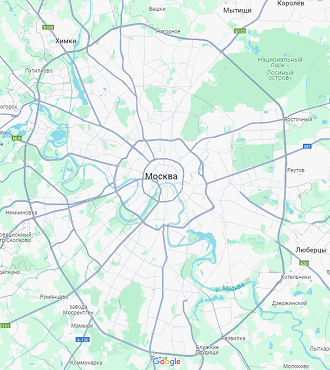

Аномальных значений для координат заведений не обнаружено их распределение чётко отрисовывает административные границы Москвы 

[К оглавлению](#0)

<a id=1.2.3.3 ></a>

##### Проверка на наличие аномальных в числовых столбцах

Проверим наличе аномальных значений в числовых столбцах

In [ ]:
plt.figure(figsize=(12, 12))

ax1 = plt.subplot(2, 2, 1)
df['rating'].hist(bins=5, grid=True)
plt.title('Проверка на наличие аномальных\n значений рейтинга\n', fontsize=20)
plt.xlabel('Оценка', fontsize=12)
plt.ylabel('Количество оценок', fontsize=12)

ax2 = plt.subplot(2, 2, 2)
df['seats'].hist(bins=50, grid=True)
plt.title('Проверка на наличие аномальных\n значений количества\n посадочных мест', fontsize=20)
plt.xlabel('Количество заведений', fontsize=12)
plt.ylabel('Количество посадочных мест', fontsize=12)

ax3 = plt.subplot(2, 2, 3)
plt.boxplot(
    df[pd.notnull(df['middle_coffee_cup'])]['middle_coffee_cup']
)
plt.grid(True)
plt.title('Проверка на наличие аномальных\n значений стоимости капучино\n', fontsize=20)
plt.ylabel('Средяя стоимость капучинно, у.е.', fontsize=12)

ax4 = plt.subplot(2, 2, 4)
plt.boxplot(
    df[pd.notnull(df['middle_avg_bill'])]['middle_avg_bill']
)
plt.grid(True)
plt.title('Проверка на наличие аномальных\n значений среднего чека\n', fontsize=20)
plt.ylabel('Средний чек, у.е.', fontsize=12)
plt.tight_layout();

Аномальных значений в столбце с рейтингов заведений со шкалойот 0 до 5 не выявлено.

In [ ]:
df.query('middle_coffee_cup > 400')

В столбце `middle_coffee_cup` сильно выделяется одно заведение. Исключим его из датафрейма

In [ ]:
df = df.loc[(df['middle_coffee_cup'] < 400) | df['middle_coffee_cup'].isna()]

[К оглавлению](#0)

<a id=1.2.3.4 ></a>

##### Проверка на наличие аномальных значений среднего чека

Рассмотрим подробнеей сумму среднего чека, построим график значений перцентилей.

In [ ]:
percentile_avg_bill=[]
percentile_range=np.arange(90, 100, 0.1)
for i in percentile_range:
    percentile_avg_bill.append(round(np.percentile(df.query('middle_avg_bill > 0')['middle_avg_bill'], [i])[0], 2))
percentile_avg_bill_df = pd.DataFrame({'percentile_range': percentile_range, 'percentile_values': percentile_avg_bill})

In [ ]:
percentile_avg_bill_df.plot(
    x='percentile_range',
    y='percentile_values',
    grid=True,
    figsize=(15, 4),
    style='o-'
)
plt.xticks(np.arange(90, 101, 0.5))
plt.title('Перцентили среднего чека\n', fontsize=20)
plt.xlabel('Перцентиль', fontsize=12)
plt.ylabel('Сумма среднего чека, у.е.', fontsize=12)
;

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Крайне изящное решение и визуализация, отлично придумано!

Из графика перцентилей видно, что происходит резкое увеличение суммы среднего чека 99.2% перцентиля, исключим из датафрейма данные выше это порога.

In [ ]:
df = (df.loc[(df['middle_avg_bill'] <= np.percentile(df.query('middle_avg_bill > 0')['middle_avg_bill'], [99.2])[0])
             | df['middle_avg_bill'].isna()])
df.shape

[К оглавлению](#0)

<a id=1.2.3.5 ></a>

##### Проверка на наличие аномальных значений количества посадочных мест

Рассмотрим подробнеей количество посадочных мест, построим график значений перцентилей.

In [ ]:
display(df.query('seats == 0')['seats'].count())
df.query('seats == 0').groupby('category')['name'].count().sort_values(ascending=False)

In [ ]:
df.groupby('seats')['seats'].count().head(11)

В столбце `seats` присутствует 136 заведений с количеством посадочных мест равных 0, также много заведений с количеством посадочных мест менее 10. В небольших заведениях вполне возможно такое количество, но не в ресторанах и столовых.

In [ ]:
df.loc[df['seats'] < 6].groupby('category')['name'].count().sort_values(ascending=False)

In [ ]:
percentile_seats_low=[]
percentile_range_low = np.arange(0, 10, 0.1)

for i in percentile_range_low:
    percentile_seats_low.append(round(np.percentile(df.query('seats > 0')['seats'], [i])[0], 2))
percentile_seats_low_df = pd.DataFrame({'percentile_range': percentile_range_low, 'percentile_values': percentile_seats_low})

In [ ]:
percentile_seats_low_df.plot(
    x='percentile_range',
    y='percentile_values',
    grid=True,
    figsize=(15, 4),
    style='o-'
)
plt.xticks(np.arange(0, 10, 0.5))
plt.title('Перцентили (ниже 10%) количества посадочных мест\n', fontsize=20)
plt.xlabel('Перцентиль', fontsize=12)
plt.ylabel('Количество посадочных мест', fontsize=12)
;

Исключим из датафрейма данные с количеством посадочных мест менее 6, т.е. ниже 1.8% перцентиля

In [ ]:
df = df.loc[(df['seats'] >= np.percentile(df.query('seats > 0')['seats'], [1.8])[0]) | df['seats'].isna()]
df.shape

In [ ]:
percentile_seats=[]

for i in percentile_range:
    percentile_seats.append(round(np.percentile(df.query('seats > 0')['seats'], [i])[0], 2))
percentile_seats_df = pd.DataFrame({'percentile_range': percentile_range, 'percentile_values': percentile_seats})

In [ ]:
percentile_seats_df.plot(
    x='percentile_range',
    y='percentile_values',
    grid=True,
    figsize=(15, 4),
    style='o-'
)
plt.xticks(np.arange(90, 101, 0.5))
plt.title('Перцентили (выше 90%) количества посадочных мест\n', fontsize=20)
plt.xlabel('Перцентиль', fontsize=12)
plt.ylabel('Количество посадочных мест', fontsize=12)
;

In [ ]:
df.query('seats > 600')['seats'].value_counts().sort_index()

In [ ]:
df.query('seats > 624')[['name', 'category', 'address', 'district', 'lat', 'lng', 'chain', 'seats']].sort_values(by=['seats', 'address'])

Ниже представлено здание с рестораном DelonixCafe, расположенным по адресу: г. Москва, проспект Вернадского, 94, корп. 1 

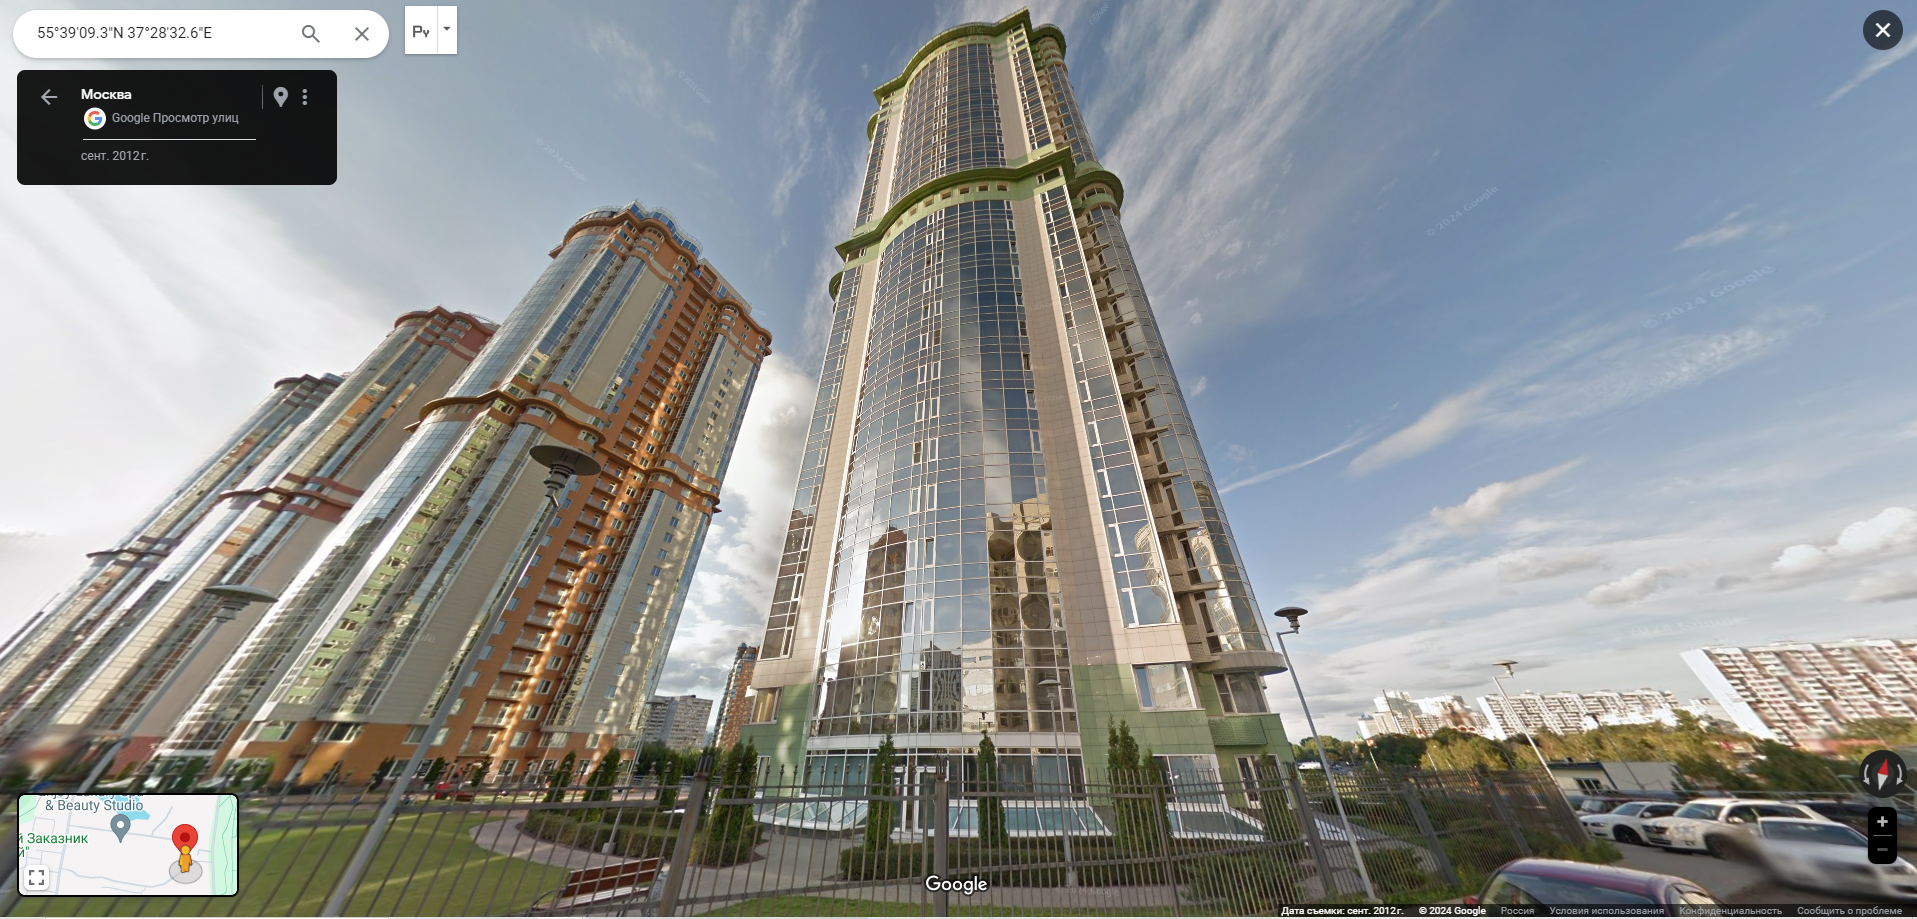

На графике перцетилей количества посадочных мест в заведениях наблюдается резкий скачёк значений на 98.3% перцентиле, созначением 625 мест. Также выдедятся относительно большое количество заведений с одинаковым аномальным количеством посадочных мест на 625 и 1288 человек. Из выше представленной таблицы видим, что заведения с одним количеством посадочных мест расположены в одних округах и зачастую по одному адресу. Такую закономерность можно объяснить общим фудкортом для нескольких заведений. Но в нашем случае это вероятно ошибки, особенно с одним количеством посадочных мест - 1288, например ресторан `DelonixCafe`, расположенный по адресу: г. Москва, проспект Вернадского, 94, корп. 1 располагается на 1 этаже многоквартирнго дома, при всём желании там не поместится такое количество посадочных мест. И само нзвании говорит о том, что это не ресторан, а кафе. Удалим из датафрейма заведения с количеством посадочных мест выше 98.8% перцентиля. 

In [ ]:
df = df.loc[(df['seats'] <= np.percentile(df.query('seats > 0')['seats'], [98.8])[0]) | df['seats'].isna()]
df.shape

Удалённые аномальные значения составили 3.5% от всего объёма датафрейма, что вписывается в рамки приемлимого диапазона 0 - 5%.

[К оглавлению](#0)

<a id=1.2.4 ></a>

#### Добавление новых столбцов

Создадим столбец `street` с названиями улиц из столбца с адресом.

In [ ]:
df.head(5)

In [ ]:
df['street'] = df['address'].apply(lambda x: re.split(', ', x)[1])
df['street']

Создадим столбец `is_24_7` с обозначением, что заведение работает ежедневно и круглосуточно (24/7). Выведедем топ-30 самым популярный часов работы заведений, для определения запроса по создания нового столбца

In [ ]:
df['hours'].value_counts().head(20)

Выберем одну ключевую фразу `ежедневно, круглосуточно` для создания столбца `is_24_7` 

In [ ]:
df['is_24_7'] = df['hours'] == 'ежедневно, круглосуточно'

[К оглавлению](#0)

<a id=2 ></a>

## Исследовательский анализ данных

### Категории заведений

Рассмотрим рассмотрим количество и доли представленные категории заведений.

In [ ]:
part_category = df['category'].value_counts()

category_colors = ['tomato', 'palegreen', 'saddlebrown', 'peru', 'gold', 'paleturquoise', 'cornflowerblue', 'wheat']

In [ ]:
plt.figure(figsize=(12, 12))

ax1 = plt.subplot(2,1,1)
plt.pie(
    part_category,
    autopct = '%1.1f%%',
    colors = category_colors,
    wedgeprops = {"linewidth": 1, "edgecolor": "white"},
    pctdistance = 0.8,
    #startangle=0,
    labels = part_category.index
)

plt.title('Доли категорий заведений  \n', fontsize=20)

ax2 = plt.subplot(2,1,2)
plots = df['category'].value_counts().plot(
        kind='bar',
        color=category_colors
)


for bar in plots.patches:
  
       plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 5),
                    textcoords='offset points')

plt.title('Категории заведений и их количество\n', fontsize=20)
plt.xlabel('Категория', fontsize=12)
plt.xticks(rotation=55)
plt.ylabel('Количество заведений, шт.', fontsize=12);
plt.tight_layout();

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

Если цвет не несет смысловой нагрузки, то делай все одним цветом. Иначе наш мозг думает, что в цвете есть какая-то логика и пытается ее отыскать
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 

Добавил цвет для каждого заведения, т.к графиков с еатегорией заведений достаточно много, а цвета помогают быстрее ориентироваться не графике не используя легенду и подписи. Попытался к каждому типу заведения подобрать ассоциативный цвет.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

Просто тонкая грань, когда цвета стоит выносить, если бы были например разные дни, цвета же столбцов вероятно были одинаковыми?!
    
    
Желаю успехов в дальнейшем обучении!
</div>

В датафрейме предствалено 8 типов заведений. Самыми распространёнными заведениями являются кафе, рестораны и кофейни, наименее распросранены столовые и булочные, котрых почти в 10 раз меньше чем кафе.

[К оглавлению](#0)

<a id=2.2 ></a>

### Количество посадочных мест в заведениях по категориям

Исследуем количество посадочных мест в заведениях по категориям.

In [ ]:
category_seats_cnt = df.groupby('category')['seats'].describe().sort_values(by='count', ascending=False).round(2)
category_seats_cnt

Количество заведений стало меньше из-за пропусков в столбце `seats`.

In [ ]:
plots1 = category_seats_cnt[['mean', '50%']].sort_values(by='50%', ascending=False).plot(
                        kind='bar',
                        figsize=(12, 6),
                        color=category_colors)

for bar in plots1.patches:
  
       plots1.annotate(format(bar.get_height(), '.0f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                        size=12, xytext=(0, 5),
                        textcoords='offset points')

plt.title('Категории посадочных мест по тпу заведения\n', fontsize=20)
plt.xlabel('Категория', fontsize=12)
plt.xticks(rotation=55)
plt.ylabel('Количество заведений, шт.', fontsize=12)
plt.legend(['Среднее коль-во', 'Медианное кооль-во']);

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Здесь лучше бы подошли ящики с усами, при помощи них можно было посмотреть не только на медианное число мест в каждом типе заведения, но оценить и квартили, среднее, насколько значительные выбросы бывают.


Наибольшее количество посадочных мест наблюдается в ресторанах. Различия между категориями заведений минимальны. Это можно объяснить широким распространением фудкортов, вероятно, для каждого заведения количество посадочных мест указано как общее для всего фудкорта, т.к. например, форматы таких заведений как булочная и кафе не предполагают такого большонго количеств посадочных мест, в то время как у всех категорий есть заведений с максимальным количеством посадочных мест более 400. 

[К оглавлению](#0)

<a id=2.3 ></a>

### Анализ сетевых и несетевых заведений

Рассмотрим соотношение сетевых и несетевых заведений в датасете

In [ ]:
display(df.groupby('chain')['name'].count())
(df.groupby('chain')['name'].count() / df.shape[0]).round(2)

Сетевых заведений 38%, несетевых 62%, рассмотрим распределение сетевых и несетевых заведений по их категориям.

In [ ]:
chain_category = (
                  df.pivot_table(index='category', columns='chain', values='name', aggfunc='count')
                  .apply(lambda x: x / sum(x), axis=1)
                  .sort_values(by=1, ascending=False)
                 )

In [ ]:
plots2 = chain_category[[0, 1]].plot(
                        kind='bar',
                        figsize=(15, 6),
                        ylim=(0, chain_category[0].max() + 0.3),
                        color = category_colors
)

for bar in plots2.patches:
  
       plots2.annotate(format(bar.get_height(), '.1%'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center', rotation=90,
                        size=12, xytext=(0, 30),
                        textcoords='offset points')

plt.title('Категории заведений и их доля\n', fontsize=20)
plt.xlabel('Категория', fontsize=12)
plt.xticks(rotation=55)
plt.ylabel('Доля заведений, %.', fontsize=12)
plt.legend(['Несетевые заведения', 'Сетевые заведения']);

Количество сетевых и несетевых заведений по категориям от общего числа заведений.

In [ ]:
chain_category = (pd.crosstab(df['category'], df['chain'], margins=True)#, normalize=True)
 .sort_values(by='All', ascending=False)
 .reset_index())
 #.style.format('{:.1%}'))
chain_category

Доли сетевых и несетевых заведений в датасете распределились как 38% и 62% соответственно. Наибольшие доли сетевых заведений, с долями более 50%, наблюдаются в булочных, пиццериях и кофейнях, а наименьшие в барах/пабах и столовых, всего 22.2% и 28.3%. В самых распрстранённых категориях заведений кафе и и ресторанах доля сетевых занимает порядка 1/3 рынка.

[К оглавлению](#0)

<a id=2.4 ></a>

### Популярные сети питания

Выделим Топ-15 самых распространённых сетей общественного питания в Москве.

In [ ]:
top_distributers = (
                    df.query('chain == 1').groupby(['name', 'category'])['name'].count()
                    .sort_values(ascending=False)
                    .to_frame()
                    .head(15)
                    .rename(columns={'name': 'count'})
                    .reset_index()
)

#for i in top_distributer['category']:
#    if (i == chain_category['category']).any():
#        print(top_distributer.loc[top_distributer['category'] == i]['count']*100)
#    else:
#        pass

In [ ]:
top_distributers_part = top_distributers.merge(chain_category[['category', 1, 'All']], how='left')

#Создаём столбцы с долями
top_distributers_part['part_of_distributers'] = top_distributers_part['count'] / top_distributers_part[1]
top_distributers_part['part_of_all_category'] = top_distributers_part['count'] / top_distributers_part['All']

(top_distributers_part[['name', 'category', 'count', 'part_of_distributers', 'part_of_all_category']]
 .style.format({'part_of_distributers': '{:.1%}', 'part_of_all_category': '{:.1%}'}))

In [ ]:
top_distributers_part.sort_values(by='part_of_distributers').plot(
    kind='barh',
    y=['part_of_distributers', 'part_of_all_category'],
    x='name',
    figsize=(12, 8),
    color = ['tomato', 'limegreen']
)
plt.title('Доли Топ-15 сетей в своих категориях\n', fontsize=20)
plt.xlabel('Доля заведений', fontsize=12)
plt.ylabel('Сеть общественного питания', fontsize=12)
plt.legend(['Доля в категории среди сетей', 'Доля среди всех заведений в категории'])
plt.xticks(np.arange(0, 0.25, 0.025))
plt.show();

Наиболее популярные категории сетей общественного питания это кофейни, пиццерии, рестораны и кафе. Самой популяной сетью является `Шоколадница` с количеством заведений 116, что составляет 16.5% от от всех сетевых кофеен и 8.5% от всех кофеен в городе. Наибольшую долю по своей категории из всех категорий занимает пиццерия `Домино'с Пицца` с долей 23% от всех сетевых пиццерий и 12.1% от всех пиццерий в Москве. Лишь на одну пиццерию меньше у сети `Додо Пицца`. Вместе их доля от всех сетевых пиццерий города составляет 55.7%, и 24% от всех пиццерий города. Самым распространённым рестораном является сеть `Яндекс Лавка`, являющяяся по сути не рестораном, а  сервисом заказа готовой еды. Можно отметить и сеть с большой долей рынка в своей категории `Буханка`, занимающей 17% от всех сетевых булочных и 10.5 от всех булочных города Москвы.

[К оглавлению](#0)

<a id=2.5 ></a>

### Административные районы

В датасете присутствуют данные по 9 административным округам Москвы. Рассмотрим распределение количества заведений этим районам.

In [ ]:
categories_in_the_district =  (pd.crosstab(df['district'], df['category'], margins=True)[:-1]
                               .sort_values(by='All', ascending=False))

categories_in_the_district.style.background_gradient(cmap='OrRd', axis=0)

In [ ]:
fig=px.bar(categories_in_the_district.sort_values(by='All').iloc[:, 0:-1],
           #barmode='group',
           orientation='h',
           color_discrete_sequence=['peru', 'wheat', 'paleturquoise', 'tomato', 'saddlebrown', 'gold', 'palegreen',
                                    'cornflowerblue'])

fig.update_layout(legend=dict(
                                orientation="h",
                                yanchor="bottom",
                                y=-0.3,
                                xanchor="right",
                                x=1
                              ),
                  title='Распределение заведений общественного питаний по административным округам г. Москвы',
                  yaxis_title='Административный округ',
                  xaxis_title='Количество заведений'
)
fig.show();

Наибольшее количество заведений общественного питания наблюдается в Центральном округе, с количеством 2215 заведений, что в 2.6 раза больше, чем расположенном на втором месте по количеству заведений Северно-Восточном округе. Наименьшее количество заведений - 386, наблюдается в Северо-Западном округе. Можно отметить меньшее количество заведений в Западных и южных районах города.

Большее количество заведений в центральном округе основывается на кратно большем количестве ресторанов, баров/пабов, и чуть меньшей степени кофеен чем в любом другом округе, т.е заведения более высокого ценового сегмента, которые чаще используют офисные служащие, бизнесмены и т.п. после и во время работы. По остальным категориям заведений увеличение их количества в Центральном районе не так велико, например, заведения быстрого питания распределены по всему городу достаточно равномерно в диапазоне 54-85 штук, за исключением Северо-Западного округа, где их всего 28. 

[К оглавлению](#0)

<a id=2.6 ></a>

### Рейтинг заведений по категориям

Рассмотрим средний рейтинг для заведений в зависимости от их категории. Используем среднее арифметическое, т.к. разброс оценок невелик.

In [ ]:
plots = df.groupby('category')['rating'].mean().sort_values(ascending=False).plot(
        kind='bar',
        color=['peru', 'gold', 'palegreen', 'wheat', 'saddlebrown', 'cornflowerblue', 'tomato', 'paleturquoise'],
        figsize=(12, 5),
        ylim=(4, 4.5)
)

for bar in plots.patches:
  
       plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 5),
                    textcoords='offset points')

plt.title('Средний рейтинг категории заведений\n', fontsize=20)
plt.xlabel('Категория', fontsize=12)
plt.xticks(rotation=55)
plt.ylabel('Средний рейтинг', fontsize=12);
plt.tight_layout();

Категории заведений с более высокой ценовой политикой имеют более высокие рейтинги. 

[К оглавлению](#0)

<a id=2.7 ></a>

### Рейтинг заведений по административным округам и категориям

Рассмотрим как изменяется рейтинг в зависимости от административного округа и категории заведения.

In [ ]:
rating_by_district = df.groupby('district')['rating'].mean().to_frame().round(2)

rating_by_category_and_district = (df.pivot_table(index='district', columns='category', values='rating', aggfunc='mean')
                                   .merge(rating_by_district, left_index=True, right_index=True)
                                   .sort_values(by='rating', ascending=False))

rating_by_category_and_district = (rating_by_category_and_district[rating_by_category_and_district
                                   .loc['Центральный административный округ'].sort_values(ascending=False).index])

rating_by_category_and_district = rating_by_category_and_district[['rating'] + [x for x in rating_by_category_and_district.columns if x != 'rating']]

rating_by_category_and_district.style.background_gradient(cmap='OrRd', axis=None).format('{:.2f}')

Построим фоновую картограмму со средним рейтингом заведений каждого округа. 

In [ ]:
try:
    with open('/datasets/admin_level_geomap.geojson', 'r', encoding='utf-8') as f:
        state_geo = json.load(f)
except:
    state_geo = requests.get('https://code.s3.yandex.net/data-analyst/admin_level_geomap.geojson').json()
    
map1_data = rating_by_district.reset_index()

#try:
#    state_geo = '/datasets/admin_level_geomap.geojson'
#except:
#    state_geo = 'https://code.s3.yandex.net/data-analyst/admin_level_geomap.geojson'

In [ ]:
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = folium.Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
rating_map = folium.Choropleth(
                                geo_data=state_geo,
                                data=map1_data,
                                columns=['district', 'rating'],
                                key_on='feature.name',
                                fill_color='OrRd',
                                fill_opacity=0.8,
                                legend_name='Медианный рейтинг заведений по округам',
                                ).add_to(m)

#Добавляем данные в Tooltip
for row in rating_map.geojson.data['features']:
    try:
        row['properties']['Средяя оценка'] = str(rating_by_district.loc[row['properties']['name'],'rating'])
    except KeyError:
        row['properties']['Средяя оценка'] = 'No adherents'
    
folium.GeoJsonTooltip(['name','Средяя оценка'],aliases=['Округ:','Средяя оценка:']).add_to(rating_map.geojson)

folium.LayerControl().add_to(m)

m

Заведения в Центральном округе имеют наивысший средний рейтинг в своих категориях, вероятно из-за высокой конкуренция и более высоких запросах посетителей заведения предоставляют лучший сервис по сравнению с другими округами. Самиый низкий рейтинг - 4.11 наблюдается в Юго-Восточном округе. Можно отметить Западный, Юго-Восточный и Северо-Западный округа, где имеются средние оценки ниже 4 баллов в категории быстрого питания.

[К оглавлению](#0)

<a id=2.8 ></a>

### Карта заведений общественного питания

Построим карту с заведениями общественного питания г. Москва.

In [ ]:
# создаём карту Москвы
m_clusters = folium.Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(m_clusters)

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    folium.Marker(
                    [row['lat'], row['lng']],
                    popup=f"{row['name']} {row['address']}",
                ).add_to(marker_cluster)

# применяем функцию create_clusters() к каждой строке датафрейма
df.apply(create_clusters, axis=1)

# выводим карту
m_clusters

Большое количество заведений общественного питания располагается в торговых центрах.

[К оглавлению](#0)

<a id=2.9 ></a>

### Улицы с наибольшим количеством заведений

Выделим Топ-15 улиц с наибольшим количеством заведений общественного питания в Москве.

In [ ]:
#Создадим список с названиями улиц входящих в топ 15 по числу заведений общественного питания
top15_streets = df.groupby(['street'])['name'].count().sort_values(ascending=False).reset_index().head(15)['street'].tolist()

#Созданим датафрейм Топ-15 улиц
df_top15_s = df.query('street in @top15_streets')
print('Доля заведений расположенных на Топ-15 улицах по количеству заведений от всех заведений в Мосвке составляет:',
      round((len(df_top15_s) / len(df) *100), 1), '%')

In [ ]:
categories_in_the_streets =  (pd.crosstab(df_top15_s['street'], df['category'], margins=True)[:-1]
                               .sort_values(by='All', ascending=False))

(categories_in_the_streets[categories_in_the_streets.loc['проспект Мира'].sort_values(ascending=False).index]
.style.background_gradient(cmap='OrRd', axis=0))

In [ ]:
fig=px.bar(categories_in_the_streets.sort_values(by='All').iloc[:, 0:-1],
           #barmode='group',
           orientation='h',
           color_discrete_sequence=['peru', 'wheat', 'paleturquoise', 'tomato', 'saddlebrown', 'gold', 'palegreen',
                                    'cornflowerblue'])

fig.update_layout(legend=dict(
                                orientation="h",
                                yanchor="bottom",
                                y=-0.3,
                                xanchor="right",
                                x=1
                              ),
                  title='Распределение заведений общественного питаний по административным округам г. Москвы',
                  yaxis_title='Административный округ',
                  xaxis_title='Количество заведений',
                  plot_bgcolor='white'
)
fig.update_xaxes(showline=True, gridcolor='silver')
fig.show();

Наибольшее количество заведений общественного питания наблюдается на протяжённых радиальных улицах ведущих в центр города, чаще всего до Садового кольца. Исключением является Пятницкая улица, также имеющая радиальное расположение, но уже внутри Садового кольца и имеющая относительно малую протяжённость, и МКАД являющийся кольцевой дорогой вокруг всей Москвы, являющийся самой длинной улицей Москвы, 108.9 км. за счёт своей протяженности она и попала в этот список. На графике отчётливо видно, что на МКАДе преобладают заведения с быстрым обслуживанием: быстрого питания и кафе. Пиццерий и булочных на МАКАде нет вообще.Наибольшее же количество заведений наблюдается на проспекте Мира - 117 штук.

[К оглавлению](#0)

<a id=2.10 ></a>

### Улицы с одним заведением

Найдём улицы на которых расположено лишь 1 заведение

In [ ]:
print('Количество улиц с одним заведением общественного питания:', (df['street'].value_counts() == 1).sum())

Построим карту с заведениями расположенными на этих улицах.

In [ ]:
df_antitop = df[~df.duplicated('street', keep=False)]
#df_antitop = df[df.groupby('street')['street'].transform('size') == 1]

In [ ]:
# создаём карту Москвы
m_clusters1 = folium.Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='OpenStreetMap')

# создаём пустой кластер, добавляем его на карту
marker_cluster1 = MarkerCluster().add_to(m_clusters1)

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters1(row):
    folium.Marker(
                    [row['lat'], row['lng']],
                    popup=f"{row['name']} {row['address']}",
                ).add_to(marker_cluster1)

# применяем функцию create_clusters() к каждой строке датафрейма
df_antitop.apply(create_clusters1, axis=1)

# выводим карту
m_clusters1

Видим, что наибольшее количество улиц с одним заведением общественного питания наблюдается в Центральном округе. Также можно сказать, что улицы с одним заведением имеют небольшую протяжённость, являются второстепенными, переулками или проездами в жилых кварталах.

[К оглавлению](#0)

<a id=2.11 ></a>

### Средний чек

Сравним средний чек в разных районах Москвы

In [ ]:
avg_bill_i = df.groupby('district')['middle_avg_bill'].median().sort_values(ascending=False).to_frame()
avg_bill = avg_bill_i.reset_index()
avg_bill_i.style.background_gradient(cmap='OrRd').format('{:.0f} ₽')

In [ ]:
m2 = folium.Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
avg_bill_map = folium.Choropleth(
                                geo_data=state_geo,
                                data=avg_bill,
                                columns=['district', 'middle_avg_bill'],
                                key_on='feature.name',
                                fill_color='OrRd',
                                fill_opacity=0.8,
                                legend_name='Средний чек по округам',
                                ).add_to(m2)

#Добавляем данные в Tooltip
for row in avg_bill_map.geojson.data['features']:
    try:
        row['properties']['Средний чек'] = str(avg_bill_i.loc[row['properties']['name'],'middle_avg_bill'])
    except KeyError:
        row['properties']['Средний чек'] = 'No adherents'
    
folium.GeoJsonTooltip(['name','Средний чек'],aliases=['Округ:','Средяя оценка:']).add_to(avg_bill_map.geojson)

folium.LayerControl().add_to(m2)

m2

Наибольшей средний чек наблюдается Центральном и Западном округах = 1000₽. Наименьшие Юго-Восточном - 450₽ и в Южном и Северо-Восточном округах - 500₽. В Юго-Восточном округе как нам известно наблюдаются и наименьший рейтинг заведений среди других округов.

Дополнительно построим карту среднего чека в заведениях для которых есть данные.

In [ ]:
fig2 = px.scatter_mapbox(df.loc[df['middle_avg_bill'] > 0].sort_values(by='middle_avg_bill'),
                  lat='lat',
                  lon='lng',
                  mapbox_style='carto-positron',
                  color='middle_avg_bill',
                  size='middle_avg_bill',
                  size_max=15,
                  color_continuous_scale='inferno',#[[0, 'black'], [0.5, 'orange'], [1.0, 'crimson']],
                  width=900, 
                  height=900,
                  zoom=9.7
)

fig2.update_layout(
                  title={
                      'text': 'Средний чек в заведениях, ₽',
                      'y':0.98,
                      'x':0.5,
                      'xanchor': 'center',
                      'yanchor': 'top'})
fig2.show()

Распределение среднего чека по районам соответствует фоновой картограмме с медианным средним чеком по округам Москвы. В Центральном округе намного больше заведений с высоким значеним среднего чека, на втором месте Западный округ, где располагаются более дорогие районы по сравнению с другими округами за исключением Центральногр округа. При удалении от центра уменьшается количество заведений с более высоким средним чеком, но все же встречаются единичные заведения с высоким средним чеком на большой удалённости от центра города. В Юго-Восточном округе, где наблюдаются минимальные размеры среднего чека можно отметить, большое количество заведений с чеком выше среднего, особенно относительно соседнего Южного округа, где средний чек выше, примерно, на 10%, но заведений с чеком выше среднего практически нет.

[К оглавлению](#0)

<a id=2.12 ></a>

### Средний чек по категориям и округам

Сравним средние чек по категориям заведений общественного питания по округам Москвы.

In [ ]:
category_distict_bill = df.pivot_table(index='district', columns='category', values='middle_avg_bill', aggfunc='mean')\
                          .sort_values(by='бар,паб', ascending=False).round(1)
category_distict_bill = (category_distict_bill[category_distict_bill
                                   .loc['Центральный административный округ'].sort_values(ascending=False).index])
category_distict_bill.style.background_gradient(cmap='OrRd', axis=None).format('{:.0f} ₽')

In [ ]:
fig=px.bar(category_distict_bill.sort_values(by='бар,паб'),
           #barmode='group',
           orientation='h',
           barmode='group',
           width=950, 
           height=1000,
           color_discrete_sequence=['palegreen', 'peru', 'wheat', 'gold', 'saddlebrown', 'tomato', 'paleturquoise',
                                    'cornflowerblue'])

fig.update_layout(legend=dict(
                                orientation="h",
                                yanchor="bottom",
                                y=-0.1,
                                xanchor="right",
                                x=1
                              ),
                  title='Средний чек заведений общественного питаний по административным округам г. Москвы',
                  yaxis_title='Административный округ',
                  xaxis_title='Средний чек, ₽',
                  plot_bgcolor='white'
)
fig.update_xaxes(showline=True, gridcolor='silver', linewidth=2, linecolor='black',)
fig.show();

Самыми дорогими заведенями являются рестораны и бары/пабы, в особенности в Центральном и Западном округах. Выделяются булочные в Центральном округе, где цены сопоставими с ресторанами и барами, выше чем в других категориях заведений и в разы выше чем в других округах. Средний чек в кафе в Центральном округе находится лишь на 6 месте среди различных категорий заведий, в то время как в других округах делит 3 и 4 места вместе с пиццериями. Самые демократичные цены наблюдается в столовых и следует отметить, что независимо от округа средний по всему городу практически одинаковый и располагается в пределах 275-365 ₽. Также в округах лидерах по среднему чеку Центральном и Западном, в столовых средний чек ниже, чем в некоторых других округах. Можно выделить булочные в Восточном и Северо-Западном округах, а также кофейни в Юго-Восточном округе, где средний чек ниже чем самым демократичных по ценам столовых. Вероятно, частично это связано с [небольшим количеством заведений этих типов в представленных округах](#2.5)

[К оглавлению](#0)

<a id=3 ></a>

## Анализ кофеен

Рассмотрим кофейни более подробно. Ииспользуем приблизительные данные о количестве населения в администравтивных округах Москвы (по данным WikPedia https://goo.su/sDE4AF)

In [ ]:
coffee_table = (
                categories_in_the_district['кофейня'].to_frame()
                .rename(columns={'кофейня': 'Количество'})
                .join(rating_by_category_and_district['кофейня'])
                .rename(columns={'кофейня': 'Рейтинг'})
                .join(category_distict_bill['кофейня'])
                .rename(columns={'кофейня': 'Средний чек'})
                .join(df.query('category == "кофейня"').groupby('district')['seats'].mean())
                .rename(columns={'seats': 'Ср. коль-во мест'})
                .join((1-df.query('category == "кофейня"').groupby('district')['chain'].mean()))
                .rename(columns={'chain': 'Доля не сетевых'})
                .join(df.query('category == "кофейня"').groupby('district')['is_24_7'].sum())
                .rename(columns={'is_24_7': 'Количество круглосуточных'})
                .sort_values(by='Количество', ascending=False)
                )

coffee_table['Доля круглосуточных'] = coffee_table['Количество круглосуточных'] / coffee_table['Количество']
coffee_table['Население, чел'] = [774430, 1455811, 1217909, 1768752, 1425114, 1508678, 1515787, 1435550, 1039596]
coffee_table['Плотность населения, чел/км2'] = [11702.67, 14289.05, 10709.15, 13422.73, 9312.38, 9743.75, 12893.76,
                                                12890.82, 11144.78]
coffee_table['Количество на человека'] = coffee_table['Количество'] / coffee_table['Население, чел']

coffee_table.style.background_gradient(cmap='OrRd', axis=0).format({
    'Рейтинг': '{:.2f}',
    'Ср. коль-во мест': '{:.0f}',
    'Средний чек': '{:.2f} ₽',
    'Плотность населения, чел/км2': '{:.1f}',
    'Доля круглосуточных': '{:.1%}',
    'Доля не сетевых': '{:.1%}'
})

Матрица корреляции

In [ ]:
coffee_table.corr().style.background_gradient(cmap='coolwarm', axis=None).format('{:.2f}')

In [ ]:
# создаём карту Москвы
m_coffee = folium.Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='OpenStreetMap')

# создаём пустой кластер, добавляем его на карту
marker_cluster_coffee = MarkerCluster().add_to(m_coffee)

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    folium.Marker(
                    [row['lat'], row['lng']],
                    popup=f"{row['name']} {row['address']}. Средний чек: {row['middle_avg_bill']}",
                ).add_to(marker_cluster_coffee)

# применяем функцию create_clusters() к каждой строке датафрейма
df.query('category == "кофейня"').apply(create_clusters, axis=1)


#Применяем индивидуальные иконки для кофеен, для которых изместен средний чек
def create_clusters(row):
    # сохраняем URL-адрес изображения со значком торгового центра с icons8,
    # это путь к файлу на сервере icons8
    icon_url = 'https://img.icons8.com/?size=100&id=f8vpZHFhtUcH&format=png&color=000000'  
    # создаём объект с собственной иконкой размером 50x50
    icon = folium.CustomIcon(icon_url, icon_size=(50, 50))
    
    # создаём маркер с иконкой icon и добавляем его в кластер
    folium.Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['middle_avg_bill']}",
        icon=icon,
    ).add_to(marker_cluster_coffee)

# применяем функцию для создания кластеров к каждой строке датафрейма
df.query('category == "кофейня" and middle_avg_bill > 0').apply(create_clusters, axis=1)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
avg_bill_coffee_map = folium.Choropleth(
                                geo_data=state_geo,
                                data=coffee_table.reset_index(),
                                columns=['district', 'Средний чек'],
                                key_on='feature.name',
                                fill_color='OrRd',
                                fill_opacity=0.4,
                                legend_name='Средний чек по округам'
                                ).add_to(m_coffee)

#Добавляем данные в Tooltip
for row in avg_bill_coffee_map.geojson.data['features']:
    try:
        row['properties']['Средний чек'] = str(coffee_table.loc[row['properties']['name'],'Средний чек'])
    except KeyError:
        row['properties']['Средний чек'] = 'No adherents'
    
folium.GeoJsonTooltip(['name','Средний чек'],aliases=['Округ:','Средний чек: ']).add_to(avg_bill_coffee_map.geojson)

folium.LayerControl().add_to(m_coffee)

# выводим карту
m_coffee

Кофейни расположены чаще не на центральных магистралях города, но, вблизи них. Большие скопления разных заведений наблюдается в торговых центрах. Также часто кофейни располагаются в административных зданиях. 

Построим график количества кофеен и круглосуточных кофеен по округам Москвы.

In [ ]:
coffee_table.sort_values(by='Количество').plot(
    kind='barh',
    y=['Количество', 'Количество круглосуточных'],
    figsize=(12, 5),
    color = ['tomato', 'limegreen']
)

for i, v in enumerate(coffee_table.sort_values(by='Количество')['Количество']):
    plt.text(v - 3 if v > 10 else v + 3, i + 0.1, str(v), color='black')
    
for i, v in enumerate(coffee_table.sort_values(by='Количество круглосуточных')['Количество круглосуточных']):
    plt.text(v - 3 if v > 10 else v + 3, i + 0.1, str(v), color='black')

plt.title('Количество кофеен по округам Москвы \n', fontsize=20)
plt.xlabel('Количество кофеен, шт', fontsize=12)
plt.ylabel('Округ Москвы', fontsize=12)
plt.legend(['Количество кофеен', 'Количество круглосуточных кофеен'])
plt.show();

Построим график среднего чека и среднего рейтинга кофеен по округам Москвы.

In [ ]:
district_list = ['ЦАО', 'САО', 'СВАО', 'ЗАО', 'ЮАО', 'ВАО', 'ЮЗАО', 'ЮВАО', 'СЗАО']

plt.figure(figsize=(15, 7))

ax1 = plt.subplot(1, 2, 1)

plt.barh(
    district_list,
    coffee_table['Средний чек'],
    color='tomato'
)

plt.title('Средний чек в кофейнях\n по округам Москвы \n', fontsize=17)
plt.xlabel('Средний чек, ₽', fontsize=12)
plt.ylabel('Округ Москвы', fontsize=12)

ax1 = plt.subplot(1, 2, 2)

plt.barh(
    district_list,
    coffee_table['Рейтинг'],
    color='palegreen'
)


plt.xlim(4, 4.4)
plt.title('Рейтинг кофеен\n по округам Москвы \n', fontsize=17)
plt.xlabel('Рейтинг по 5 бальной шкале', fontsize=12)

plt.show();

Наибольшее количество кофеен расположено в Центральном округе - 422, с большим отрывом от остальных округов. Можно сказать, что большее количество заведий располанается в Северных округах, за исключение Северо-Западного, где наблдается наименьшее количество кофеен из всех округов, но здесь же отмечается второй после Центрального округа средний рейтинг заведений. Наибольшая доля круглосуточных кофеен наблюдается в Юго-Западном округе - 55.1% (сейчас и далее по кофейням для которых доступны данные о часаъх работы. Также этот показатель высокий в Центральном, Западном и Восточных округах в более 30%. В Южном округе данных о кругосуточных кофейнях нет. По карте можно увидеть, что большая часть кофеен в Этом округе расположены в торговых центрах и административных зданиях, которые обчно не рабтаю круглосуточно. Этим можно и объяснить большое средне количество мест в этом округе, т.к. веронятно их количесвто берётся из общего количество мест фудкортов расположенных в торговых центрах. Юго-Восточный округ не пользуется популярностью среди сетевых кофеен, 67.5% кофеен здесь несетевые. В западном округе наоборт, лишь 37.5% кофеен являются несетевыми.

Из матрицы корреляции видим, что:
- Для рейтинга кофеен наблюдается прямая средняя корреляция с количеством на человека и количеством круглосуточных кофеен и обратная средняя корреляция с количеством населения в округе;
- Для среднего чека наблюдается сильная прямая корреляция с количеством заведений и количеством круглосуточных кофеен и средняя корреляция с количеством мест;
- Для несентевых кофеен наблюдается обратная средняя корреляция со средним чеком и количеством мест. По всем рассматриваемым параметрам для несетевых кофеен наблюдается отрицательная корреляция, за исключением количества неселения, где корреляция отсутствует. 

Несетевые кофейни имеют меньшие показатели по всем рассматриваемы параметрам, меньше средний чек, количество посадочных мест, количество круглосуточных кофеен и рейтинг. Люди предпочитают сетевые кофейни. 

Можно сделать вывод, что при открытии кофейни следует обратить внимание на увеличение количества посадочных мест и круглосуточной работы заведения. Также в округах с высокой конкуренций средний чек оказывается выше. Стоит обратить внимание на Западный округ, где наблюдается высокий средний чек, большое количество населения, при этом относительно небольшое количество кофеен с относительно низким средним рейтингом, что может говорить об их неудовлетворительном качестве, а следовательно будет легче конкурировать с ними, или о более высоких запросах посетили. Стоит обратить внимание на Северо-Западный округ, где наблюдается наименьшее количество кофеен и среднее количество кофеен на человека среди всех округов. Также можно рассмотреть открытие круглосуточной кофейни в Южном округе, где наблюдается относительно высокий средний чек и отсутствуют круглосуточные кофейни, но следует обратить внимание на наименьшую плотность населения, а значит следует искать место с большим потоком людей в узловых районах округа.

<a id=4 ></a>

## Вывод

[К оглавлению](#0)

Инвесторы из фонда «Shut Up and Take My Money» решили попробовать себя в новой области и открыть заведение общественного питания в Москве. Мы подготовили исследование рынка Москвы. Более подробно остановившись на кофейнях, на окрытие которой нацелен инвестор.

Нам доступен датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Информация, размещённая в сервисе Яндекс Бизнес носит исключительно справочный характер, она могла быть добавлена пользователями или найдена в общедоступных источниках. В датасете представлены данные о 8406 заведениях, после предобработки, удаления аномальных значений осталось 8107 заведений. Представлены даанные о восьми типах заведений общественного питания: кофейни, кафе, рестораны, бары/пабы, пиццерии, булочные, заведения бастрого питания и столовые.

После проведения исследования рынка общественного питаний города Москва быди выявлены следующие особенности:
- доля от общего количества заведений общественного птания:
    - кафе, 28.3%;
    - рестораны, 24.5%;
    - кофейни, 16.8%;
    - бары/пабы, 9.2%;
    - пиццерии, 7.6%;
    - заведения быстрого питания, 6.9%;
    - столовые, 3.8%;
    - булочные, 2.9%.
- наибольшее количество посадочных мест наблюдается в ресторанах, но разброс небольшой 91 - 117, вероятно из-за включения в статистику данных о количестве посадочных мест всего фудкорта, для каждого заведения;
- доли сетевых и несетевых заведений в датасете распределились как 38% и 62% соответственно. Наибольшие доли сетевых заведений, с долями более 50%, наблюдаются в булочных, пиццериях и кофейнях, а наименьшие в барах/пабах и столовых. В самых распрстранённых категориях заведений кафе и и ресторанах доля сетевых занимает порядка 33% рынка;
- наиболее распространённые категории сетей общественного питания это кофейни, пиццерии, рестораны и кафе. Самой популяной сетью является `Шоколадница`. Пиццерии `Домино'с Пицца` и `Додо Пицца` вместе занимают 55.7% доли рынка от сетевых пиццерий города, и 24% от всех пиццерий города. Самым распространённым рестораном является сеть `Яндекс Лавка`, являющяяся не рестораном, а  сервисом заказа готовой еды;
- наибольшее количество заведений общественного питания наблюдается в Центральном округе, наименьшее в Северо-Западном округе. Можно отметить меньшее количество заведений в Западных и южных районах города. Большее количество заведений в центральном округе основывается на кратно большем количестве ресторанов, баров/пабов, т.е. заведений более высокого ценового сегмента;
- категории заведений с более высокой ценовой политикой имеют более высокие рейтинги. Самыми дорогими заведенями являются рестораны и бары/пабы, в особенности в Центральном и Западном округах. Выделяются булочные в Центральном округе, где цены сопоставими с ресторанами и барами, выше чем в других категориях заведений и в разы выше чем в других округах.
- заведения в Центральном округе имеют наивысший средний рейтинг в своих категориях, вероятно из-за высокой конкуренция и более высоких запросах посетителей заведения предоставляют лучший сервис по сравнению с другими округами;
- наибольшее количество заведений общественного питания наблюдается на протяжённых радиальных улицах ведущих в центр города, чаще всего до Садового кольца. Исключением является Пятницкая улица, также имеющая радиальное расположение, но уже внутри Садового кольца и имеющая относительно малую протяжённость, и МКАД являющийся кольцевой дорогой вокруг всей Москвы, являющийся самой длинной улицей Москвы, 108.9 км.;
- наибольшее количество улиц с одним заведением общественного питания наблюдается в Центральном округе. Улицы с одним заведением имеют небольшую протяжённость, являются второстепенными, переулками или проездами в жилых кварталах;
- в Центральном округе большое количество заведений с высоким значением среднего чека, на втором месте Западный округ. При удалении от центра уменьшается количество заведений с более высоким средним чеком.

Проанализировав кофейни можно рекомендовать, при их октрытии следует обратить внимание на увеличение количества посадочных мест и круглосуточной работы заведения. В округах с высокой конкуренций средний чек оказывается выше. Стоит обратить внимание на Западный округ, где наблюдается высокий средний чек, большое количество населения, при этом относительно небольшое количество кофеен с относительно низким средним рейтингом. Стоит обратить внимание на Северо-Западный округ, где наблюдается наименьшее количество кофеен и среднее количество кофеен на человека среди всех округов. Также можно рассмотреть открытие круглосуточной кофейни в Южном округе, где наблюдается оносительно высокий средний чек, но круглосуточные кофейни отсутствуют. Следует обратить внимание на наименьшую плотность населения, а значит следует искать место с большим потоком людей.